In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('survey_results_public.csv')

In [3]:
data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 31.6+ MB


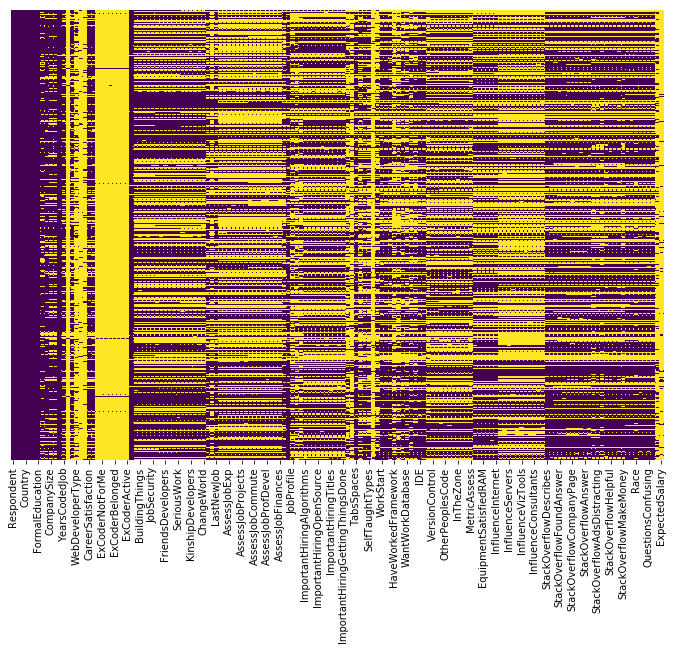

In [6]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)

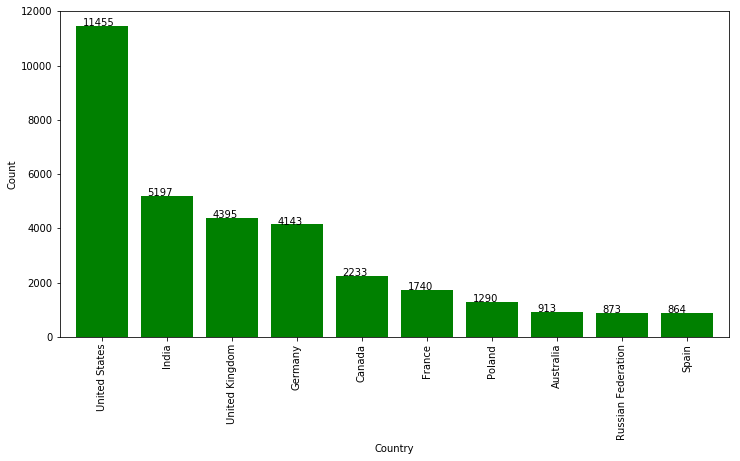

In [7]:
plt.subplots(figsize=(12,6))
ax=data['Country'].value_counts()[:10].plot.bar(width=0.8,color='green')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.25))
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

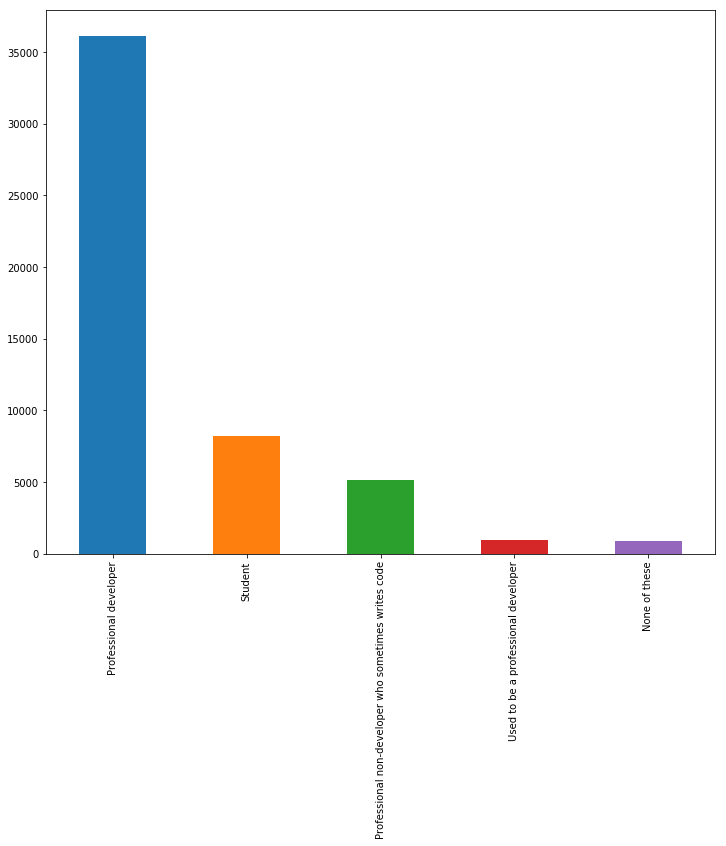

In [8]:
#Proffesion of Respondents
data['Professional'].value_counts().plot(kind='bar',figsize=(12,10))

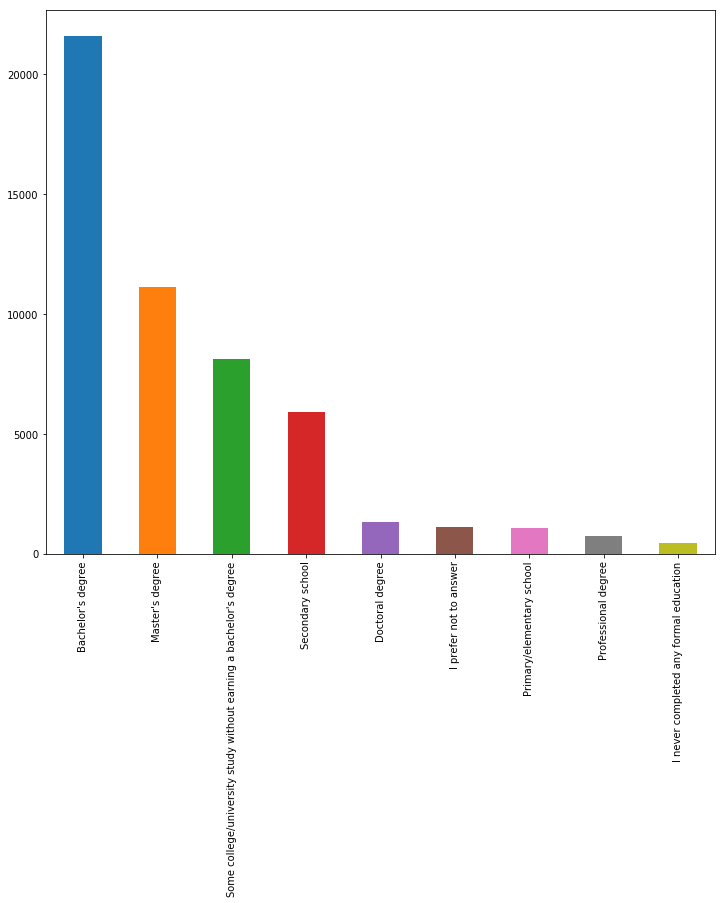

In [9]:
data['FormalEducation'].value_counts().plot(kind='bar',figsize=(12,10))

In [10]:
data.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [11]:
data['r_user'] = data['HaveWorkedLanguage'].apply(lambda x: 'R' in str(x).split('; '))
data['python_user'] = data['HaveWorkedLanguage'].apply(lambda x: 'Python' in str(x).split('; '))

Mean salary by language:
lang
Both       63584.372432
Neither    54166.607159
Python     61481.626273
R          68205.555297
Name: Salary, dtype: float64


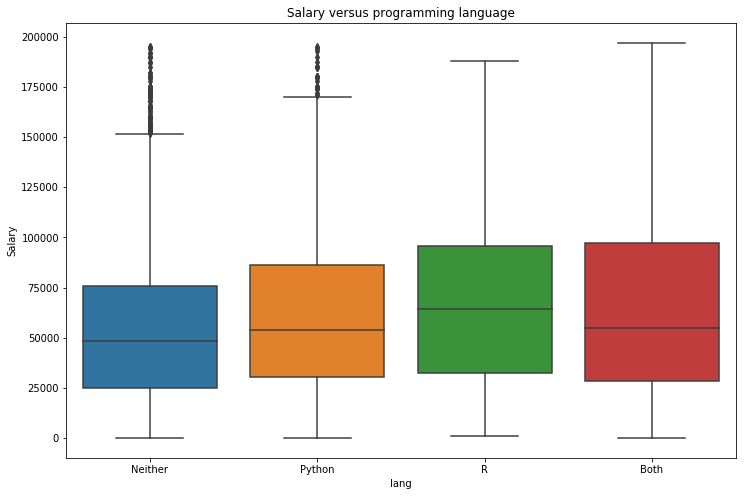

In [12]:
#data_select = data[data['r_user'] + data['python_user'] > 0]
def langs(row):
    row = [int(i) for i in row.values]
    if sum(row) == 2: return 'Both'
    elif row[0] == 1: return 'R'
    elif row[1] == 1: return 'Python'
    else: return 'Neither'
    
order = ['Neither', 'Python', 'R', 'Both']
    
data['lang'] = data[['r_user', 'python_user']].apply(langs, axis=1)

plt.figure(figsize=(12, 8))
sns.boxplot(x="lang", y="Salary", data=data, order=order)
plt.title('Salary versus programming language')
print('Mean salary by language:')
print(data.groupby('lang')['Salary'].mean())

Mean of ideal workday start time:
lang
Both       9.330993
Neither    9.427562
Python     9.579671
R          9.293624
Name: WorkStartProcessed, dtype: float64


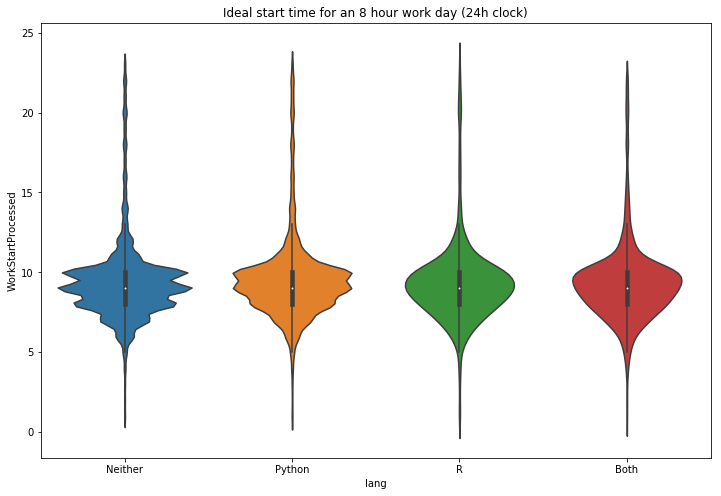

In [13]:
def parse_dates(date):
    date = str(date)
    if 'Noon' in date:
        return 12.
    elif 'AM' in date:
        return float(date.split(':')[0])
    elif 'PM' in date:
        return float(date.split(':')[0]) + 12
    else:
        return np.nan

plt.figure(figsize=(12, 8))
plt.title('Ideal start time for an 8 hour work day (24h clock)')
data['WorkStartProcessed'] = data['WorkStart'].apply(parse_dates)
sns.violinplot(x="lang", y="WorkStartProcessed", data=data, order=order)
print('Mean of ideal workday start time:')
print(data.groupby('lang')['WorkStartProcessed'].mean())

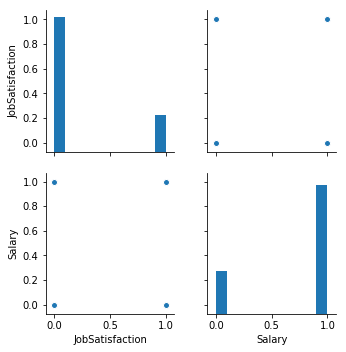

In [14]:
sns.pairplot(data[['JobSatisfaction','Salary']].isnull())

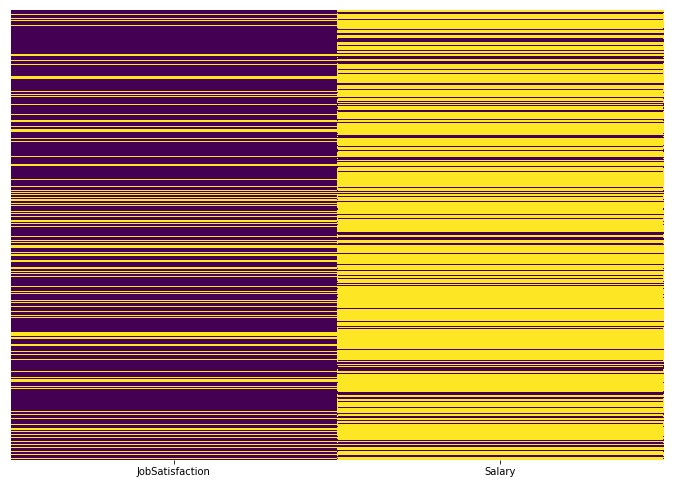

In [15]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.heatmap(data[['JobSatisfaction','Salary']].isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)

In [16]:
data['Currency'].value_counts()

U.S. dollars ($)               7073
Euros (€)                      5849
British pounds sterling (£)    2176
Indian rupees (?)              2176
Canadian dollars (C$)          1062
Polish zloty (zl)               564
Australian dollars (A$)         469
Russian rubles (?)              366
Brazilian reais (R$)            359
Swedish kroner (SEK)            306
Swiss francs                    300
South African rands (R)         174
Mexican pesos (MXN$)            144
Japanese yen (¥)                123
Chinese yuan renminbi (¥)       121
Singapore dollars (S$)           79
Bitcoin (btc)                    67
Name: Currency, dtype: int64

In [17]:
some_data = data[(data['Currency'].notnull()) & (data['Overpaid'].notnull())]

In [18]:
some_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12076 entries, 2 to 51390
Columns: 158 entries, Respondent to WorkStartProcessed
dtypes: bool(2), float64(7), int64(1), object(148)
memory usage: 7.7+ MB


In [19]:
some_data['Currency'].head(10)

2     British pounds sterling (£)
14    British pounds sterling (£)
17               U.S. dollars ($)
18               U.S. dollars ($)
22               U.S. dollars ($)
25               U.S. dollars ($)
34                      Euros (€)
36               U.S. dollars ($)
37                      Euros (€)
52           Brazilian reais (R$)
Name: Currency, dtype: object

In [20]:
some_data['Currency'].value_counts()

U.S. dollars ($)               4369
Euros (€)                      3179
British pounds sterling (£)    1386
Indian rupees (?)               789
Canadian dollars (C$)           663
Polish zloty (zl)               310
Australian dollars (A$)         273
Brazilian reais (R$)            237
Swedish kroner (SEK)            194
Russian rubles (?)              188
Swiss francs                    157
South African rands (R)         106
Mexican pesos (MXN$)             89
Japanese yen (¥)                 53
Chinese yuan renminbi (¥)        46
Singapore dollars (S$)           27
Bitcoin (btc)                    10
Name: Currency, dtype: int64

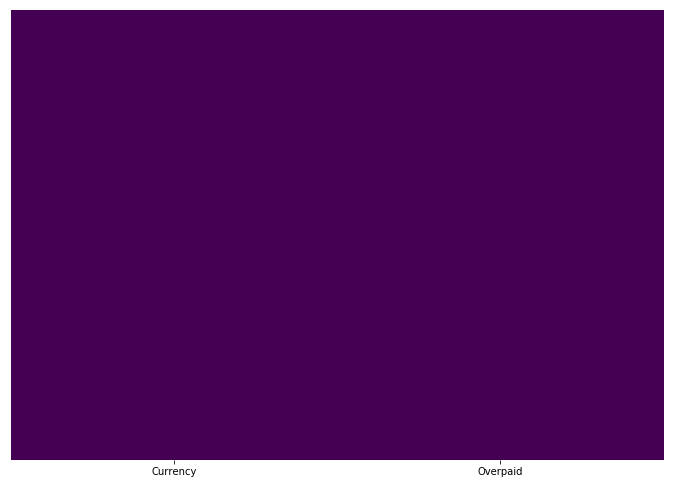

In [21]:
#Checking whether the data is clean
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.heatmap(some_data[['Currency','Overpaid']].isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)

[Text(0,0,'British pounds sterling (£)'), Text(0,0,'U.S. dollars ($)'), Text(0,0,'Euros (€)'), Text(0,0,'Brazilian reais (R$)'), Text(0,0,'Indian rupees (?)'), Text(0,0,'Polish zloty (zl)'), Text(0,0,'Swedish kroner (SEK)'), Text(0,0,'Canadian dollars (C$)'), Text(0,0,'Russian rubles (?)'), Text(0,0,'Swiss francs'), Text(0,0,'Mexican pesos (MXN$)'), Text(0,0,'Australian dollars (A$)'), Text(0,0,'Japanese yen (¥)'), Text(0,0,'Chinese yuan renminbi (¥)'), Text(0,0,'Singapore dollars (S$)'), Text(0,0,'South African rands (R)'), Text(0,0,'Bitcoin (btc)')]


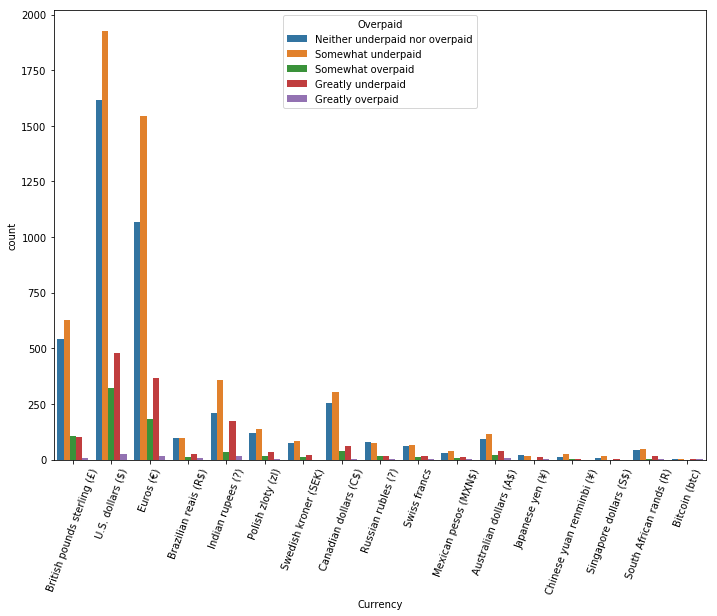

In [22]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
g=sns.countplot(some_data['Currency'],hue=some_data['Overpaid'],ax=ax)
print(g.set_xticklabels(some_data['Currency'].unique(),rotation=70))

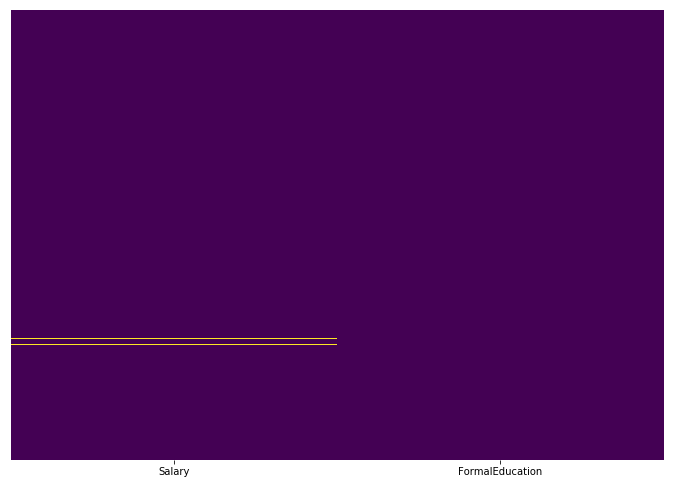

In [23]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.heatmap(some_data[['Salary','FormalEducation']].isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)

In [24]:
for HaveWorkedLanguage in frozenset.union(*some_data.HaveWorkedLanguage):
    some_data[HaveWorkedLanguage] = some_data.apply(lambda _: int(genre in _.genre), axis=1)

TypeError: descriptor 'union' requires a 'frozenset' object but received a 'str'

In [25]:
df = pd.Series([('Adventure', 'Drama', 'Fantasy'), ('Comedy', 'Family'), ('Drama', 'Comedy', 'Romance'), (['Drama']), 
                    (['Documentary']), ('Adventure', 'Biography', 'Drama', 'Thriller')]).apply(frozenset).to_frame(name='genre')
for genre in frozenset.union(*df.genre):
    df[genre] = df.apply(lambda _: int(genre in _.genre), axis=1)

In [ ]:
df

In [26]:
#data['HaveWorkedLanguage'].apply(lambda techlist : str(techlist).split("; "))
df1 = data['HaveWorkedLanguage'].apply(lambda techlist : str(techlist).split("; "))
df1 = pd.Series(df1).apply(frozenset).to_frame(name='Languages')
for Languages in frozenset.union(*df1.Languages):
    df1[Languages] = df1.apply(lambda _: int(Languages in _.Languages), axis=1)

In [27]:
df1.head()

,Languages,Objective-C,Smalltalk,JavaScript,Groovy,Visual Basic 6,Julia,Haskell,Matlab,Rust,...,Elixir,Scala,CoffeeScript,Ruby,F#,TypeScript,Dart,Hack,R,C#
0,(Swift),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(Ruby, SQL, JavaScript, Python)",0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,"(PHP, Java, Python)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"(R, SQL, Matlab, Python)",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,(nan),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df1.describe()

,Objective-C,Smalltalk,JavaScript,Groovy,Visual Basic 6,Julia,Haskell,Matlab,Rust,Erlang,...,Elixir,Scala,CoffeeScript,Ruby,F#,TypeScript,Dart,Hack,R,C#
count,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,...,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000
mean,0.045708,0.006363,0.445108,0.023214,0.020840,0.002685,0.012628,0.030530,0.008095,0.005468,...,0.007394,0.025471,0.023194,0.064679,0.008892,0.067870,0.002821,0.002082,0.031795,0.242762
std,0.208852,0.079514,0.496983,0.150583,0.142849,0.051750,0.111666,0.172042,0.089606,0.073743,...,0.085672,0.157552,0.150522,0.245962,0.093880,0.251526,0.053043,0.045582,0.175455,0.428756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


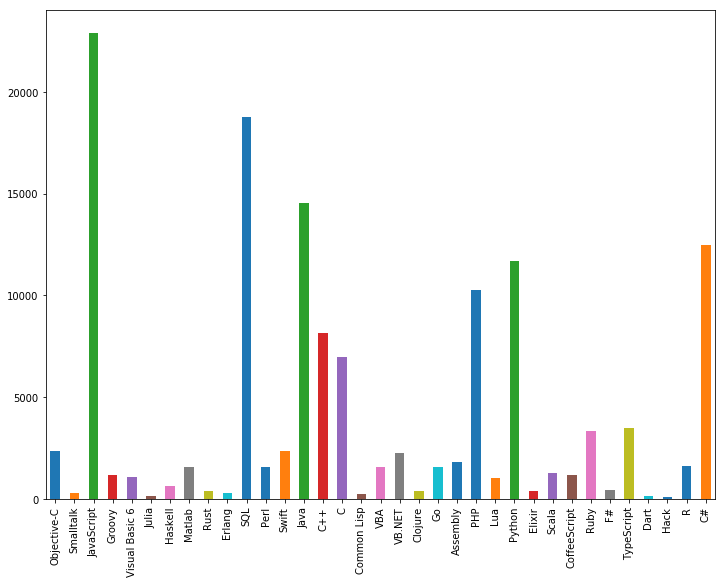

In [43]:
df1.sum().drop('nan').plot(kind='bar',figsize=(12,9))

In [39]:
data['ExpectedSalary'].dropna().describe()

count      2566.000000
mean      33142.220468
std       30162.988829
min           0.000000
25%        4490.492484
50%       29364.263691
75%       50403.225806
max      187500.000000
Name: ExpectedSalary, dtype: float64

In [40]:
salary_data = data[(data['Salary'].notnull()) & (data['ExpectedSalary'].notnull())]

In [42]:
salary_data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,r_user,python_user,lang,WorkStartProcessed
